
# Predicting Boston Housing Prices



## About dataset

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print 'Boston housing dataset has {} data points with {} variables each.'.format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration


### Implementation: Calculate Statistics


 the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.


In [15]:
#  Minimum price of the data
minimum_price = np.min(prices)

#  Maximum price of the data
maximum_price = np.max(prices)

#  Mean price of the data
mean_price = np.mean(prices)

#  Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation



1. An increase of value 'RM' would increase the value of "MEDV". More rooms mean more space and comfort for family or people. 
2. An increase of value 'LSTAT' will decrease the value of 'MEDV' because lower-class neighborhood tends to impact on house prices and it will lower the houses price.
3. Increase the value of 'PTRATIO' would decrease the value of "MEDV". Clearly more students per teachers mean low funding of schools, everybody wants more focus from their mentors but the higher the ratio of Students per teachers impact on reputation and lower the neighborhood home prices.  

All above features, a decrease in their value will result in the opposite of above mentioned result.

----

## Developing a Model


### Implementation:  Performance Metric
 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._



In [17]:

from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [18]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.



The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable.
R2 score 0 means can't predict from independent variable.
R2 score 1 means can predict without error.
In my case R2 score is 0.923(90% variance) means prediction is good and near the 1, so i can say that model successfully captured the variation of the target variable. 

### Shuffle and Split Data


In [24]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 53)

# Success
print "Training and testing split was successful."

Training and testing split was successful.



Training and Testing split is beneficial for validation.If I apply some split data as training data (known) and some data as testing or unseen data for a model that I can validate my model's accuracy and I can avoid high bias or high variance problem. (Without validating may be my model good for training data but fails to predicts new data.)

----

## Model Performance
Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

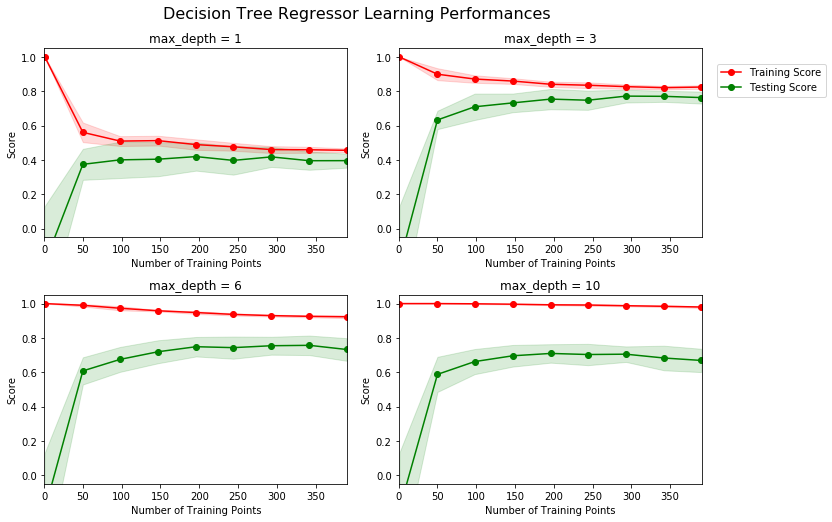

In [25]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

I would like to choose max_depth = 3. As more training points added, the increase in the testing curve but a decrease in the training curve noted. In around 0.8~ value training and testing curves converge up to that point adding more points will help to beneficial for the model, after that point i can see that adding more training points are not beneficial for model it would only increase the cost for training and testing.

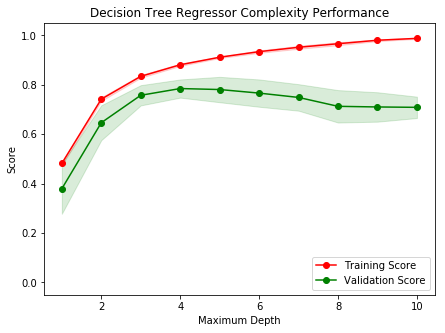

In [26]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff



When the model is trained with maximum depth =1 both training and testing scores are low it suffers from high bias problem and underfits the model. 
At max depth = 10 training score is high but testing score is low so, model suffer from overfitting due to high variance. 
I can justify my conclusions based on the consistent variance on the validation score,at max-depth =1 the training and validation curves converges and other end at max-depth = 10 both have large gap.





I think at maximum_depth = 4 the model good generalize to the unseen data. after the 4 both curves diverge and model overfit due to high variance and 4 is a good choice where training and testing scores are good and of course high validation score.

-----

## Evaluating Model Performance



Grid search is technique for tune or optimize hyperparameters. the simplest idea is i need to define a set of parameter values and than train model for all possible parameter combinations and select the best one.
Example :
A {1, 2, 3}
B {0.1, 0.2, 0.3} 
C {(1,0.1), (1,0.2), (1,0.3), (2,0.1), (2,0.2), (2,0.3), (3,0.1), (3,0.2), (3,0.3)}
here grid search examine all pairs and determine best performing pair and helps to select the best one.


In k-fold cross-validation technique dataset is split into K "folds" of equal size. each fold is act as the testing set 1 time and act as training set k-1 times.average testing performance is considered a result.
the benefit is it dosen't matter how data is divided every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times so it suffer less from the high variance.In otherside GridSearch return a tuned model that depends on some specific division of train and test sets that predict poorly in a general. If we don't use CV set and run grid-search the output would have a high variance.



In [33]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 23)

    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':range(1,11)}

     
    scoring_fnc = make_scorer(performance_metric)

    
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions


In [34]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.




 The optimal max_depth = 5 which is not same as per my guess 4. 

In [35]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $426,189.47
Predicted selling price for Client 2's home: $194,345.45
Predicted selling price for Client 3's home: $875,700.00


Predicted selling prices
Client 1's home: $ 426,189.47

Client 2's home: $ 194,345.45

Client 3's home: $ 875,700.00


From Above
Minimum price: $ 105,000.00

Maximum price: $ 1,024,800.00

Mean price: $ 454,342.94

Median price: $ 438,900.00

SDV price: $ 165,171.13

(1)For client 2's home $ 194,345.45 seems reasonable due to high poverty level and student-teacher ratio. 

(2)For client 1's $426,189.47 it also seems reasonable due to the average poverty level and student-teacher ratio.

(3)Lastly the house's price from client 3 is $ 875,700.00 which is high above the mean and median prices but let consider the low poverty level and student-teacher ratio with a high number of rooms that's seems ok for high rate.

### Sensitivity


In [36]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $379,125.00

Range in prices: $41,497.22



The data collected on 1978 is not relevant in 2018.
LSTAT is not very important in today people chooses online learning as well today, I think there are not enough features to describe a home, some missing features like public transport, crime rate, backyard, pool, climate should be considered for the more accurate predictions and robustness. Data collected in a Boston not be applicable in rural cities.The model is very sensitive because in multiple trial price variance is wide and which is not practical for real-world data. 
